# Analysing car mpg data set using clustering and PCA

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [3]:
# Check top few records to get a feel of the data structure
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
mpg_df.describe().transpose()     # horsepower is missing

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [5]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [6]:
mpg_df = mpg_df.replace('?', np.nan)

In [7]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [8]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [9]:
numeric_cols = mpg_df.drop('car_name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(mpg_df[['car_name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


##  Step 4 Let us do a pair plot analysis to visually check number of likely clusters

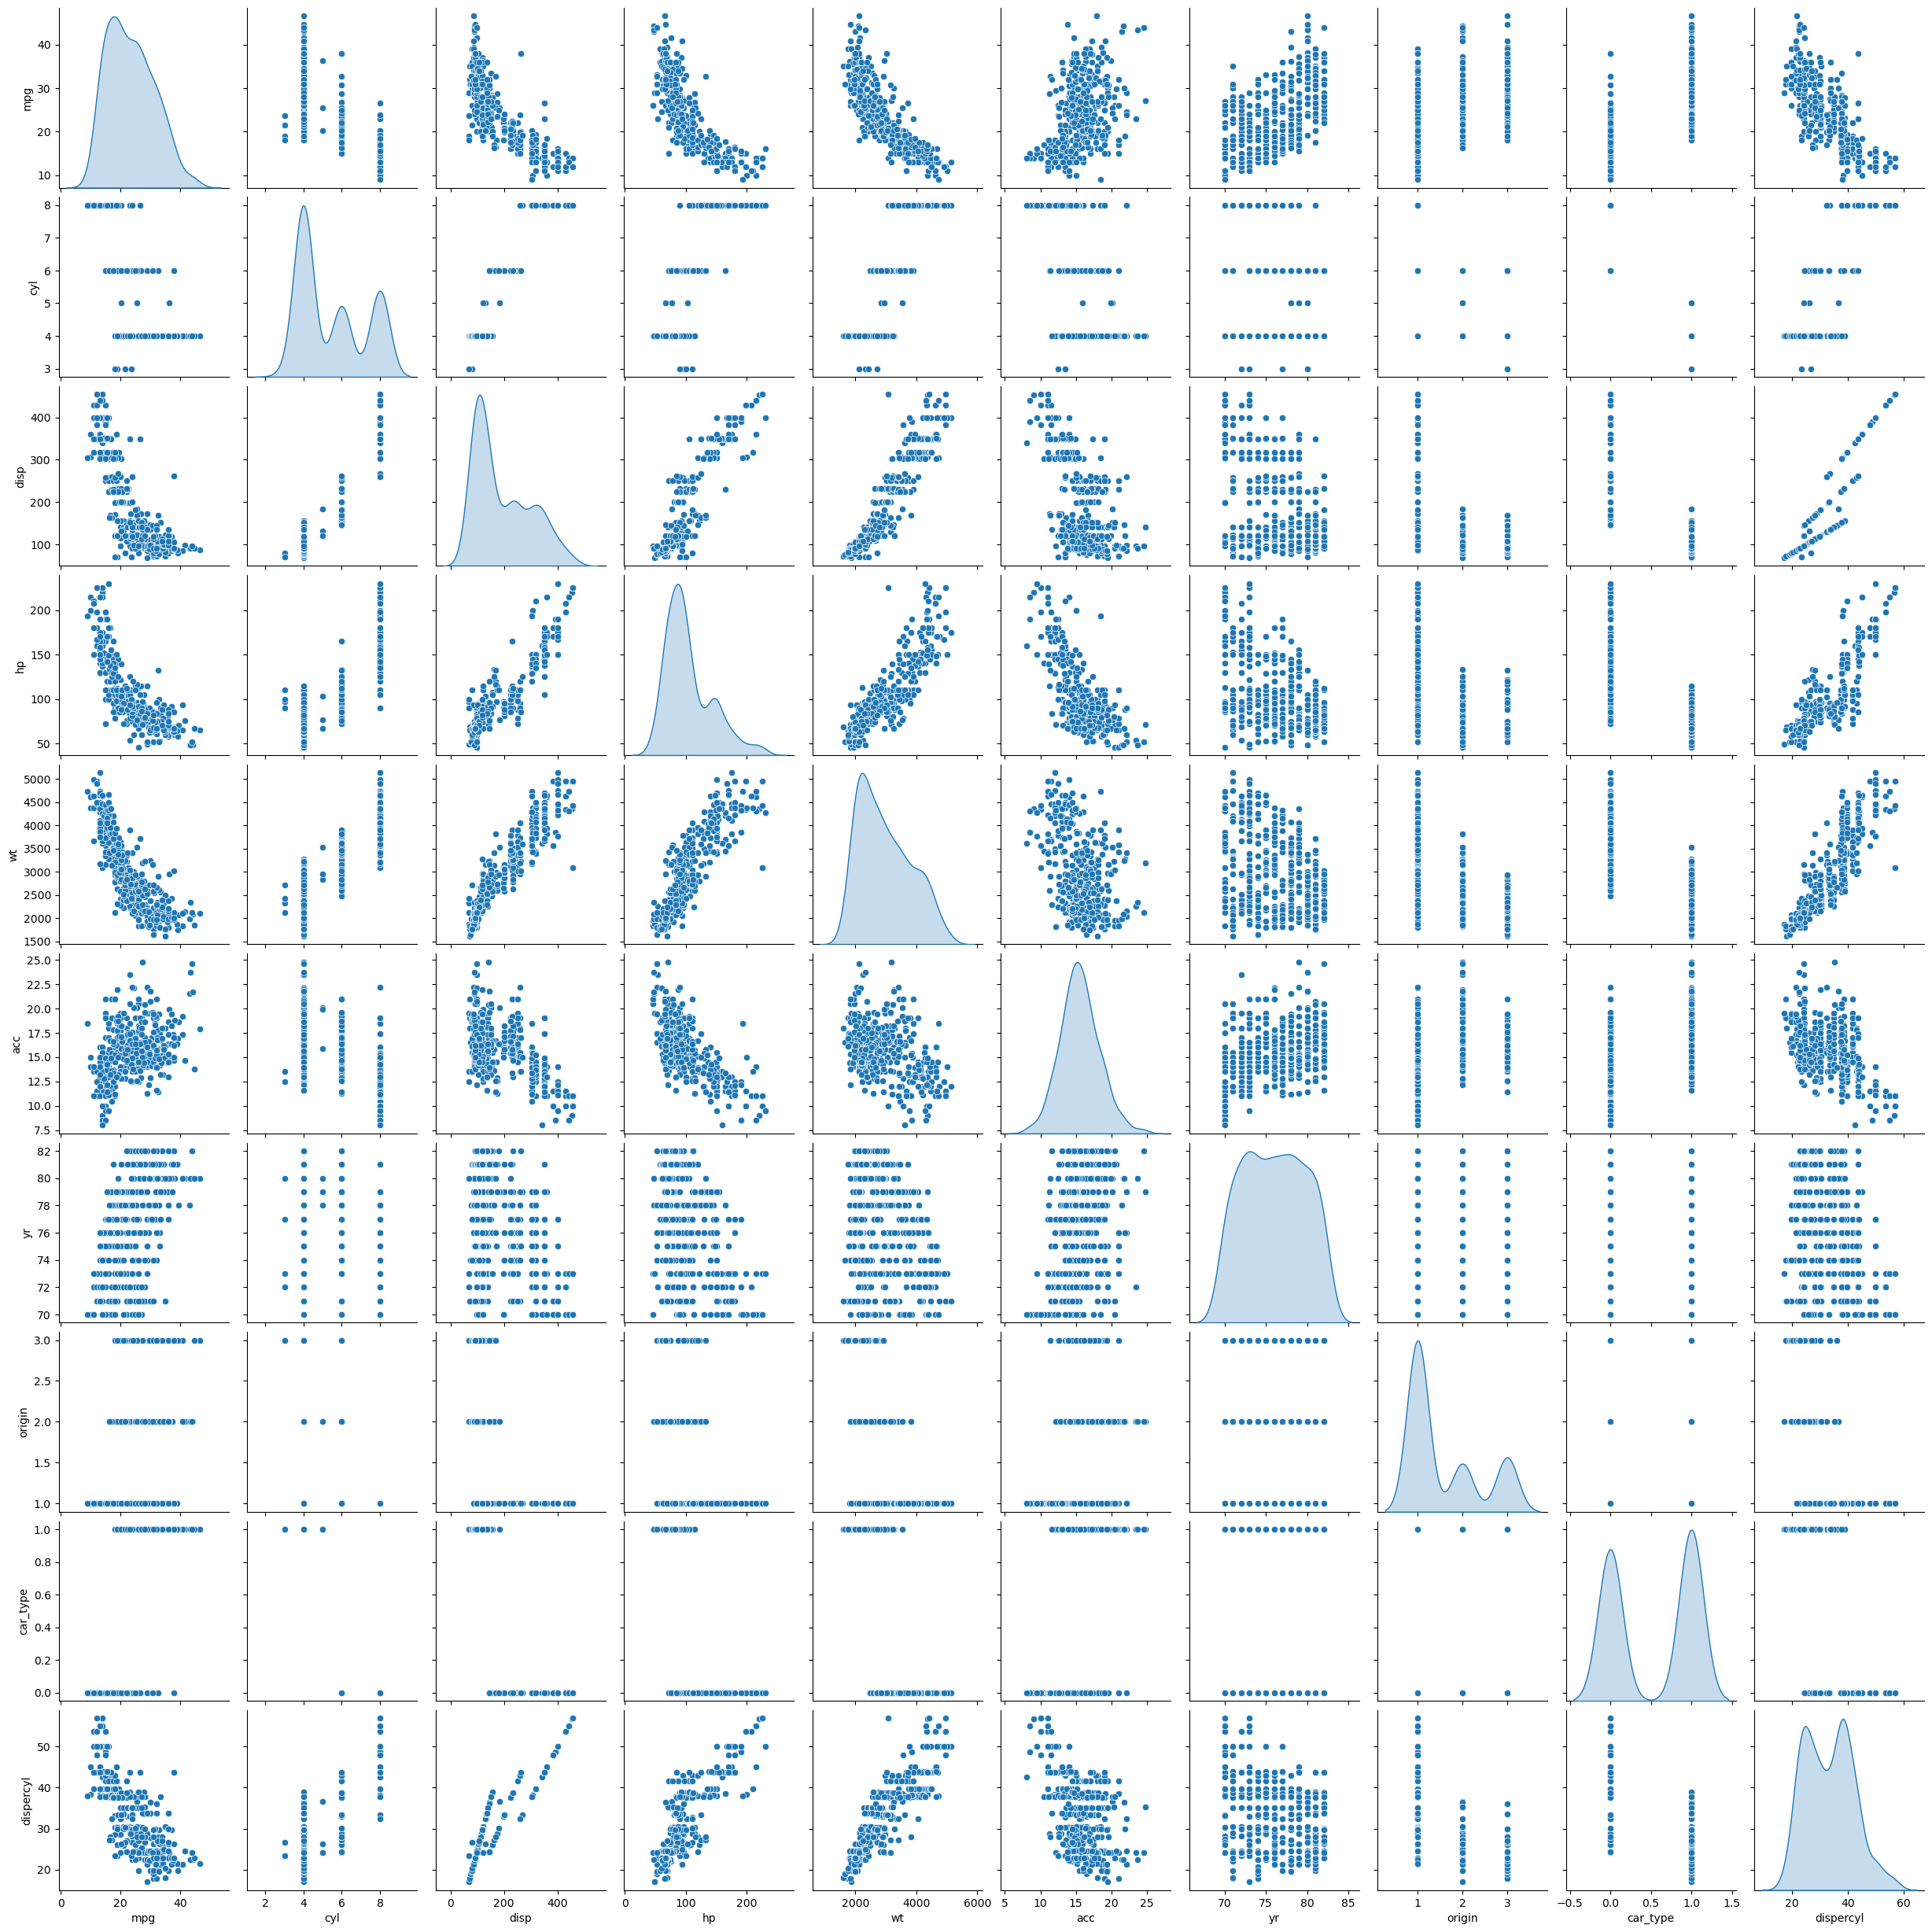

In [10]:
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:, 0:9]
mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

# Step 5 LINEAR MODEL BUILT ON ORIGINAL RAW DATA

In [11]:
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

mpg_df_attr_z.pop('origin')      # Remove "origin" and "yr" columns
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values
X = array[:,1:5] # select all rows and first 7 columns which are the attributes
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [12]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

SVR()

In [13]:
y_pred = clr.predict(X_test)

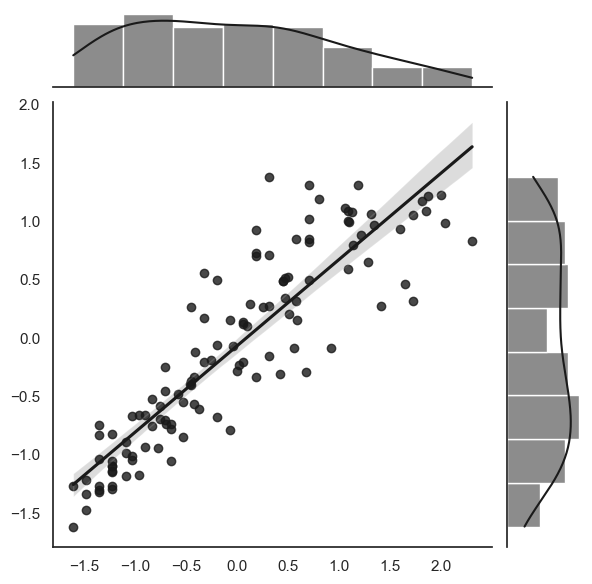

In [14]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");


##  ITERATION 2 





In [15]:
# 1. Drop acc column based on the above visual analysis

mpg_df_attr_z.pop('acc')

array = mpg_df_attr_z.values
X = array[:,1:5] # select all rows and first 7 columns which are the attributes
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

            
          


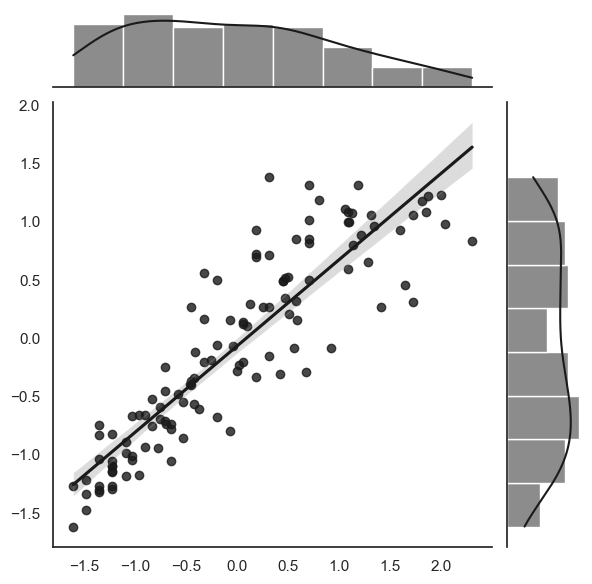

In [16]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [18]:
# Achieved 89% on the test data. The low score is due to the large spread and apparent mix of gaussians
# Let us explore the data for hidden clusters

# Step 6 KMeans Clustering

In [19]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,7.428960e+07,2
1,3.420817e+07,3
2,1.905688e+07,4
3,1.377029e+07,5


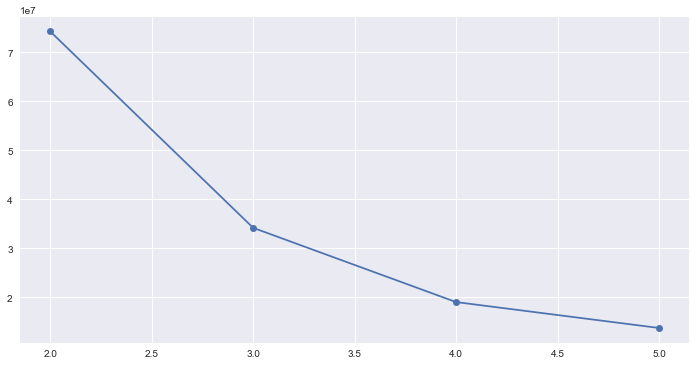

In [20]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [21]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [22]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [23]:
centroids = cluster.cluster_centers_
centroids

array([[-1.12726026,  1.4864187 ,  1.46865697,  1.47338845,  1.36736404,
        -1.03371846, -0.61198576, -0.71514478],
       [ 0.89844152, -0.81610375, -0.86426529, -0.70547867, -0.86985567,
         0.27002569,  0.31010992,  0.95968268],
       [-0.23301503, -0.12590632, -0.05634295, -0.24639985,  0.02416321,
         0.43720956,  0.08226919, -0.60579879]])

In [24]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-1.127260,1.486419,1.468657,1.473388,1.367364,-1.033718,-0.611986,-0.715145
1,0.898442,-0.816104,-0.864265,-0.705479,-0.869856,0.270026,0.310110,0.959683
2,-0.233015,-0.125906,-0.056343,-0.246400,0.024163,0.437210,0.082269,-0.605799


In [25]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E040AC4E0>,
      dtype=object)

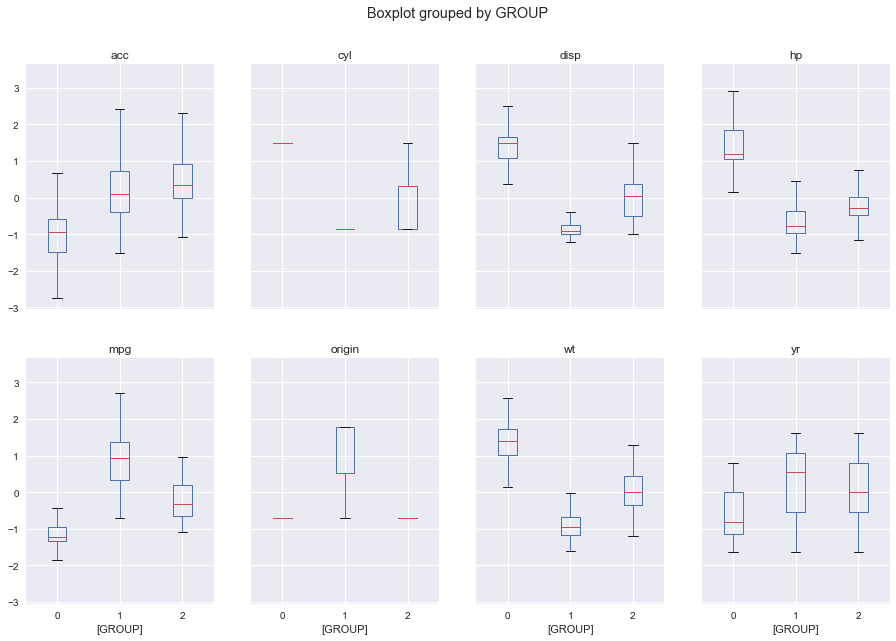

In [26]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))



In [27]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)


## Identifying and handling outliers



In [28]:
# Addressing outliers at group level

data = mpg_df_attr_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))


C:\Users\Mukesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E03FFC668>,
      dtype=object)

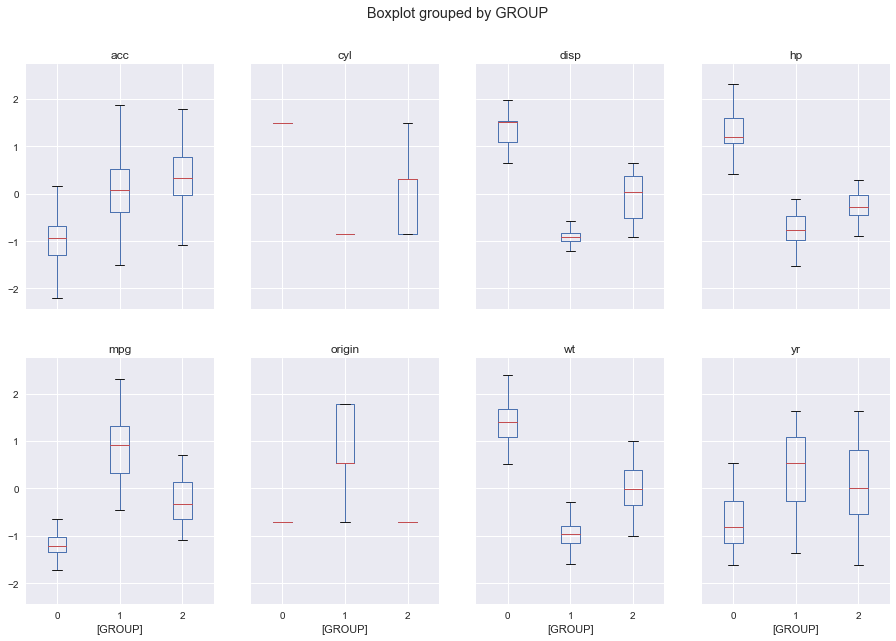

In [29]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them


# Let us analyze the mpg column vs other columns group wise. 

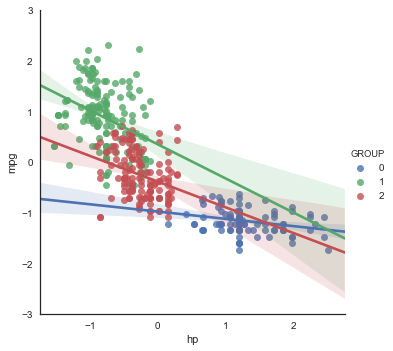

In [30]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

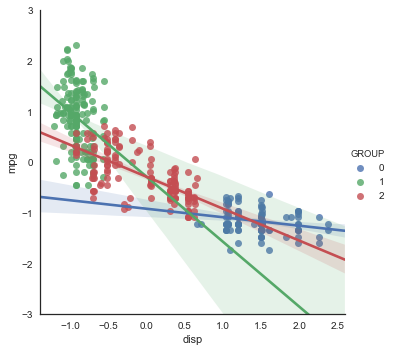

In [31]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

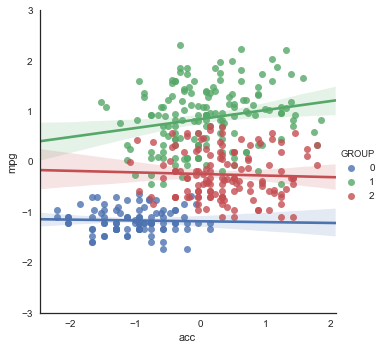

In [32]:
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

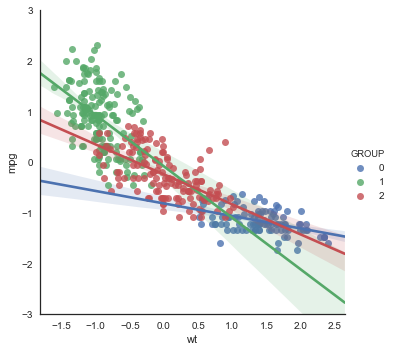

In [33]:
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

# STEP 7 - Break clusters into separate datasets and analyze individually.

In [34]:
# Let us break the data into largecar and smallcar segments

largecar = concat_data[concat_data['GROUP']==0]
smallcar = concat_data[concat_data['GROUP']==1]
sedancar = concat_data[concat_data['GROUP']==2]


C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Mukesh\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


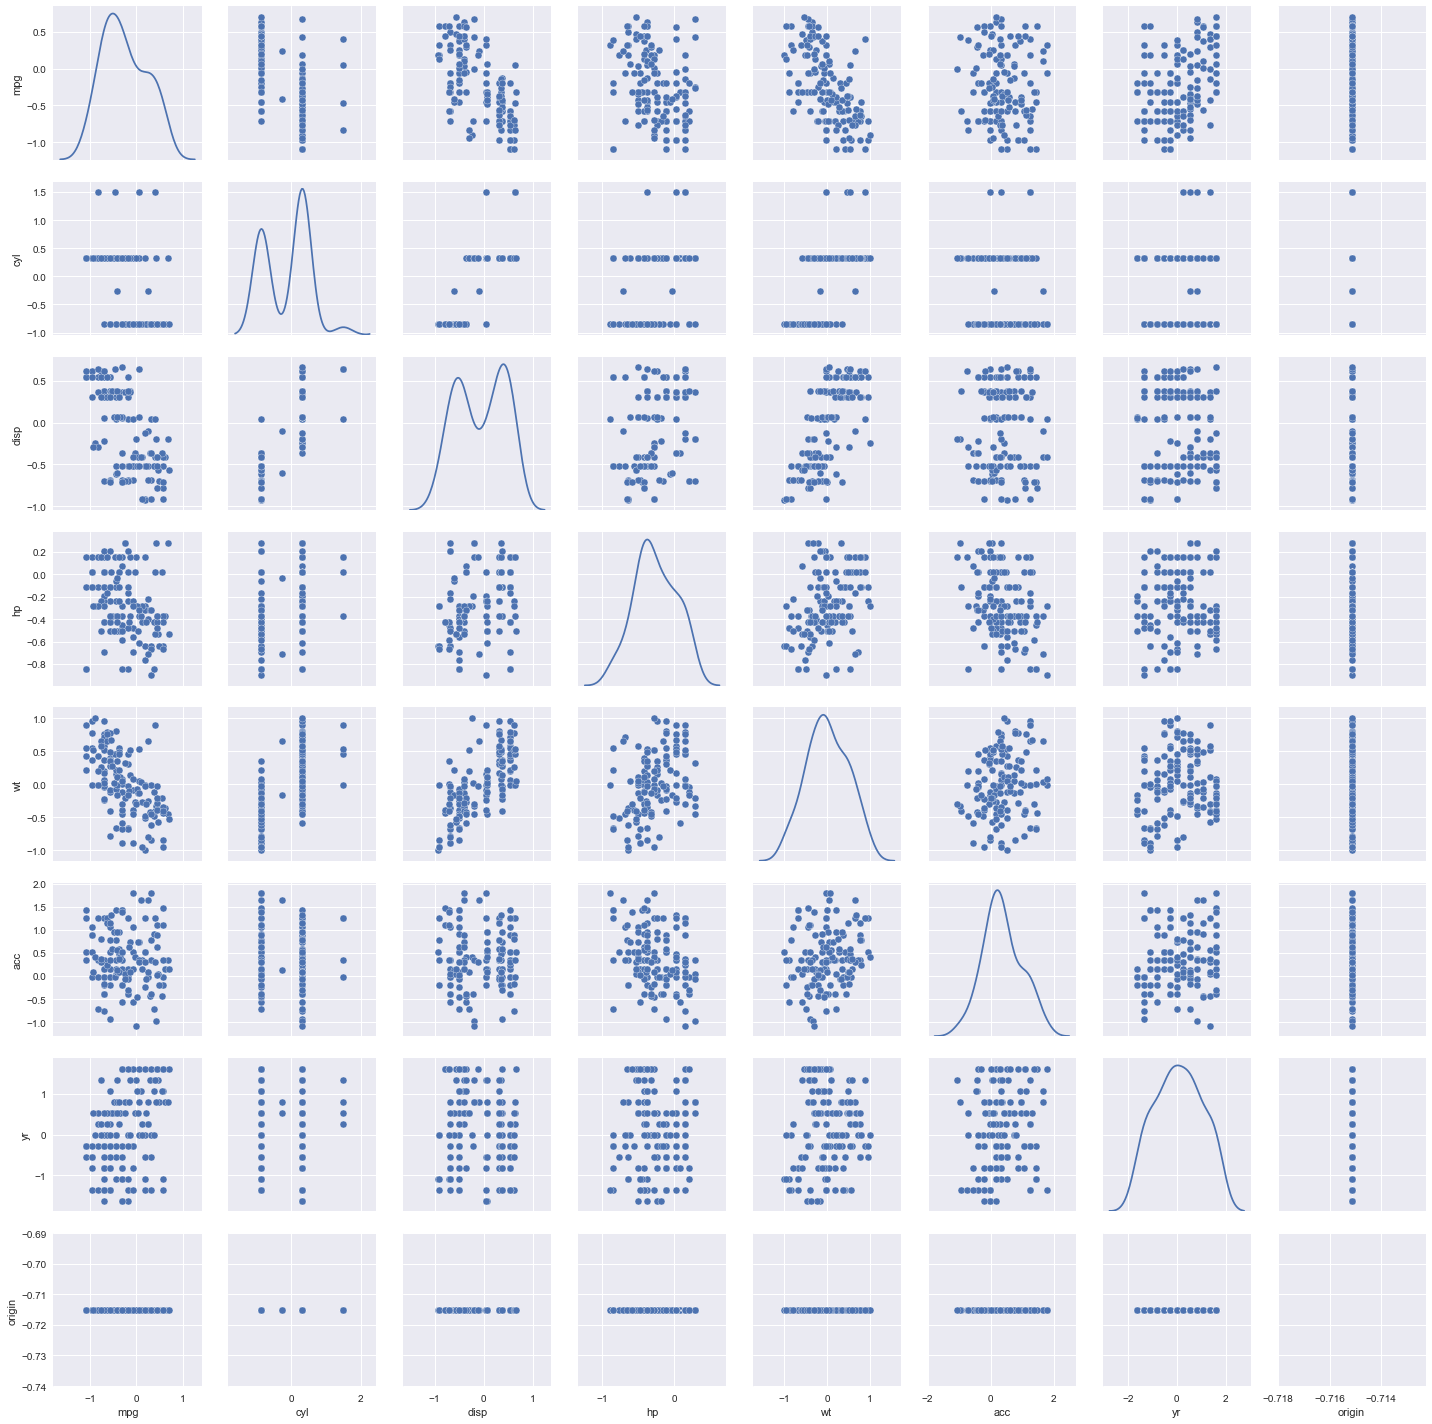

In [35]:
# Let us look at largecar pair panel

mpg_df_attr = sedancar.iloc[:, 0:8]   # CHANGE THE CARTYPE AT THIS POINT TO CHECK HOW THE MODEL PERFORMS FOR EACH GROUP

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [36]:
mpg_df_attr.shape

(137, 8)

In [37]:
from sklearn import svm
clr = svm.SVR()  


array = mpg_df_attr.values
X = array[:,1:5] # select all rows and first 7 columns which are the attributes
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

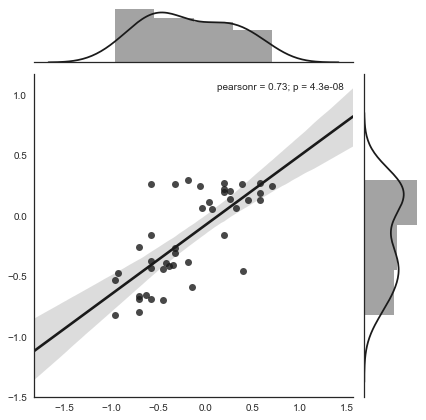

In [38]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
    
# Discuss the accuracy score for each group in background of the visual distribution of data in the individual plots above

# STEP 8 Alternative clustering strategy by origin. Since each record belongs to one origin, the cluster based on origin can be obtained using "group" 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E07BE1198>,
      dtype=object)

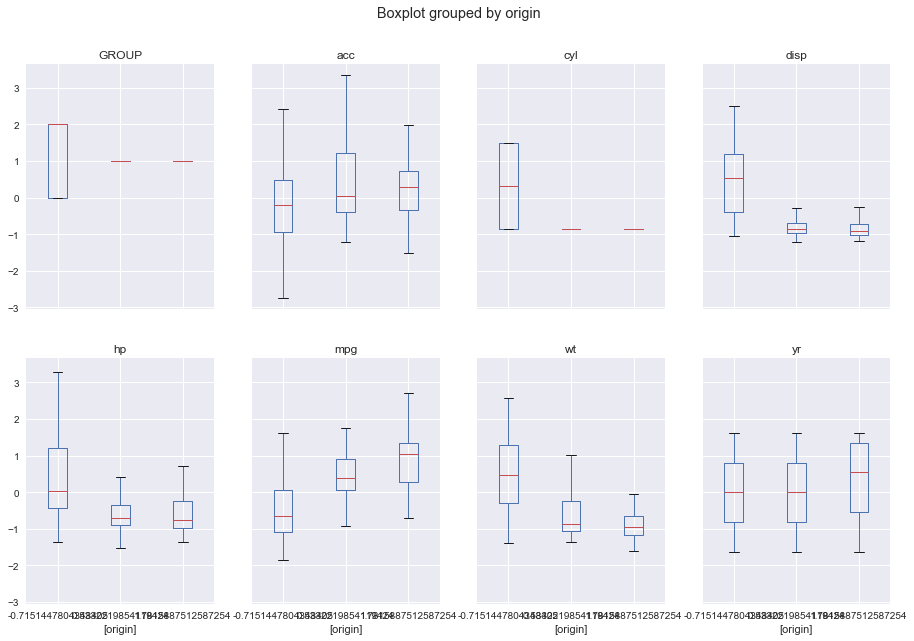

In [39]:

mpg_df_attr_z.boxplot(by = 'origin',  layout=(2,4), figsize=(15, 10))

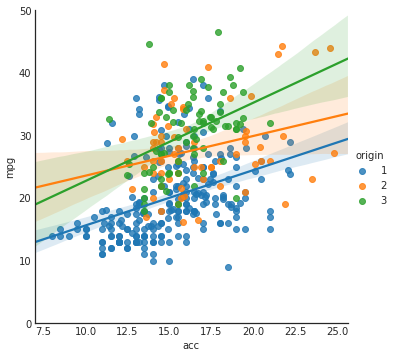

In [27]:
# Let us analyze origin wise. Do the origins form natural groups

# Looking at the countrywise spread, maybe subclusters i.e. within origin cluster sub clusters will give better results

var = 'acc'


with sns.axes_style("white"):
    plot = sns.lmplot( var,'mpg',data=mpg_df_attr,hue='origin')
plot.set(ylim = (0,50))

In [ ]:
# Observations -  

# 1. Origin based clustering is not clearly distinguishing the clusters on any dimension

# 2. Two groups of cars based on origin ( America and Europ + Asia) is unlikely to give better results as they overlap on
# all dimensions. 

# 3. Instead, grouping into large and small cars may give better clusters.

# Step 9  Repeat Step 6 and 7 with K = 4

In [40]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction

mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)

In [41]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.19662962, -0.83253762, -0.82055067, -0.54470596, -0.76233792,
         0.30865024, -0.64549188,  0.65931964],
       [-1.15871315,  1.49819126,  1.50068407,  1.51412926,  1.40001604,
        -1.07612225, -0.6725559 , -0.71514478],
       [-0.45827132,  0.30214934,  0.26682559, -0.09477119,  0.30537297,
         0.36925702,  0.04913083, -0.66202279],
       [ 1.21535383, -0.80280894, -0.78556433, -0.73643544, -0.78395572,
         0.33604619,  1.1198019 ,  0.58996593]])

In [42]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0.196630,-0.832538,-0.820551,-0.544706,-0.762338,0.308650,-0.645492,0.659320
1,-1.158713,1.498191,1.500684,1.514129,1.400016,-1.076122,-0.672556,-0.715145
2,-0.458271,0.302149,0.266826,-0.094771,0.305373,0.369257,0.049131,-0.662023
3,1.215354,-0.802809,-0.785564,-0.736435,-0.783956,0.336046,1.119802,0.589966


In [43]:
# Addressing outliers at group level

data = mpg_df_attr_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))


C:\Users\Mukesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E08B746A0>,
      dtype=object)

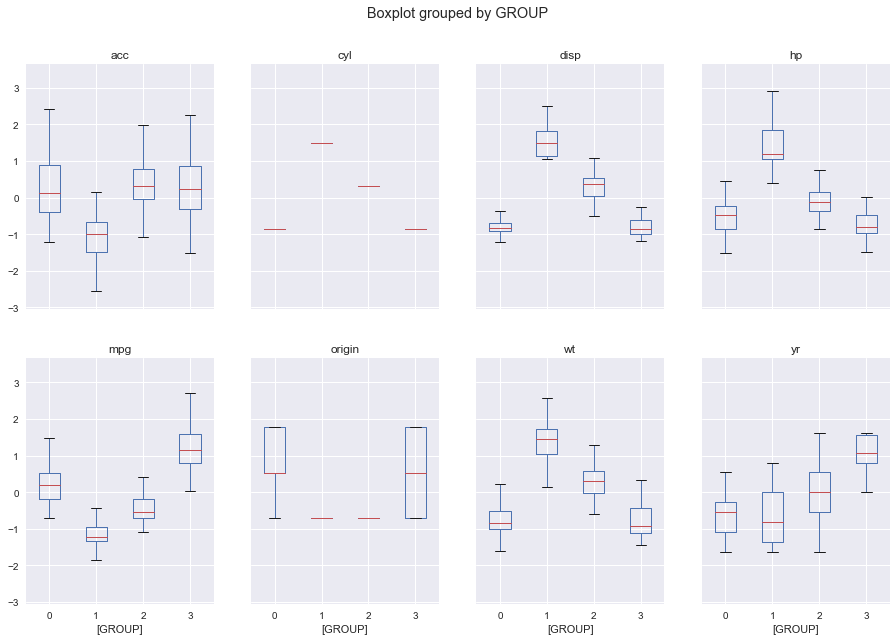

In [44]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))


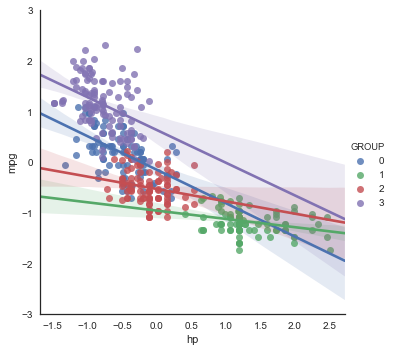

In [45]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

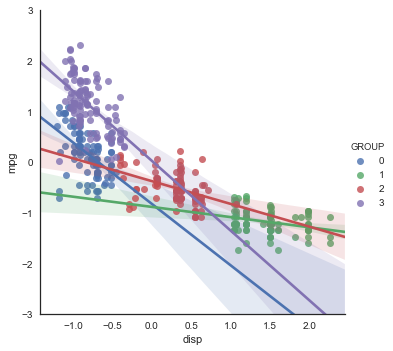

In [46]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

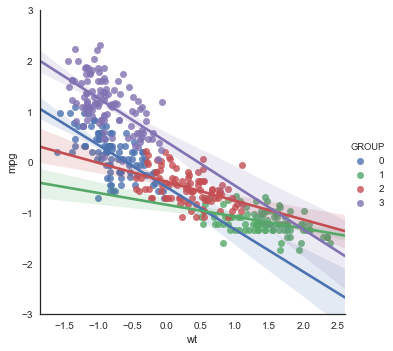

In [47]:
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [48]:
# Let us break the data into largecar and smallcar segments

largecar = concat_data[concat_data['GROUP']==1]
smallcar = concat_data[concat_data['GROUP']==0]
sedancar = concat_data[concat_data['GROUP']==2]
minicar  = concat_data[concat_data['GROUP']==3]

C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Mukesh\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


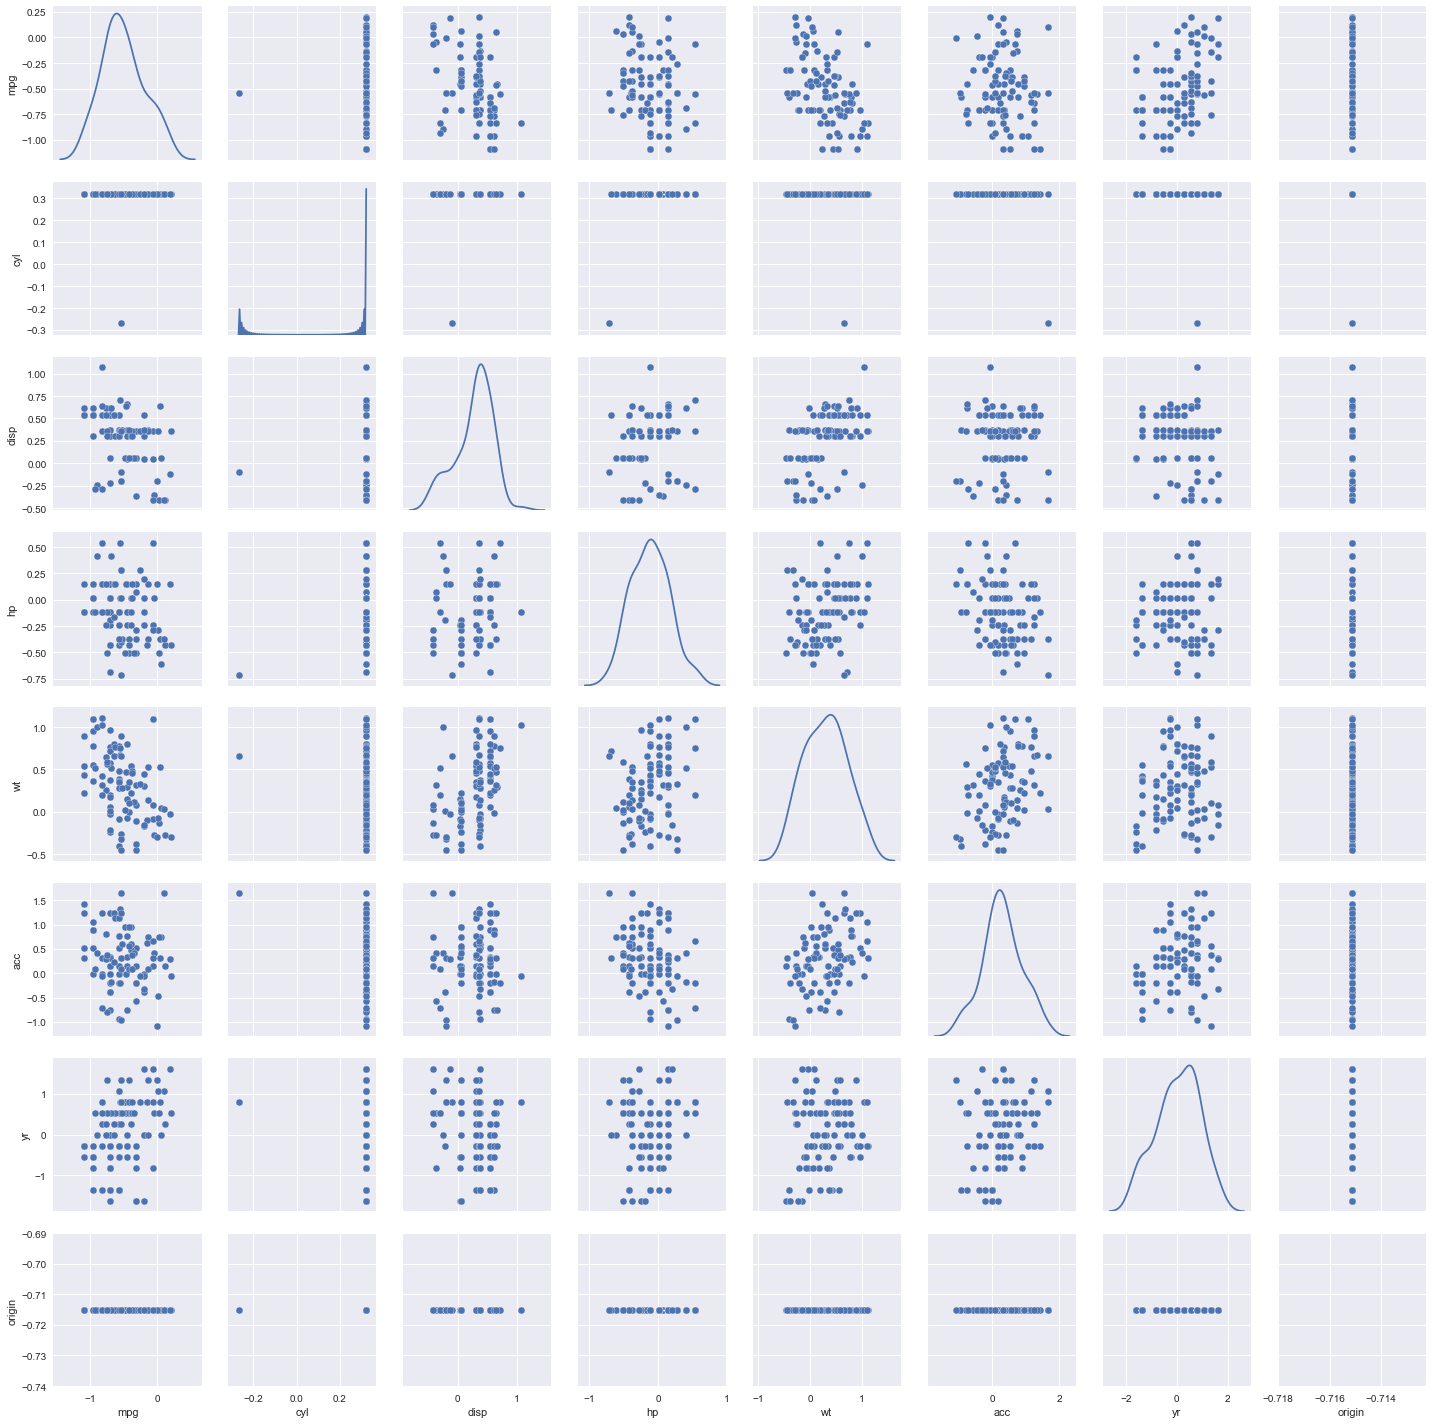

In [49]:
# Let us look at largecar pair panel

mpg_df_attr = sedancar.iloc[:, 0:8]

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [50]:
from sklearn import svm
clr = svm.SVR()  


array = mpg_df_attr.values
X = array[:,1:5] # select all rows and first 7 columns which are the attributes
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

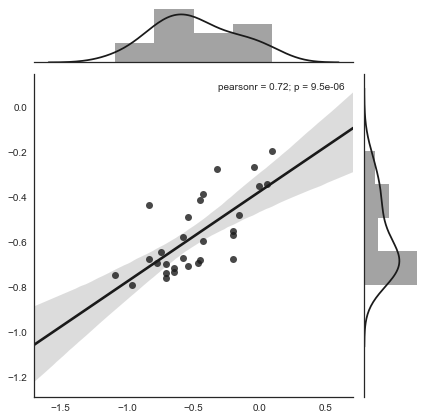

In [51]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [52]:
# Most of the attributes are now showing almost gaussian distribution 
# The interaction between dimensions too is relatively more linear
# But there is a lot of spread.

# STEP 10 Kmeans clustering is not helping at all. Try PRINCIPAL COMPONENT ANALYSIS

In [53]:
# PCA should be used when the relations are linear. Looking at the pairplot, "Cyl", "yr" and "Origin" 
# are likely to be ineffective. So let us remove them before doing the PCA.

# Apply PCA for each group of cars

In [54]:
cols_to_drop = ["cyl", "origin", "GROUP" , "acc"]

car_attr = smallcar.drop(cols_to_drop , axis = 1)

car_mpg = np.array(car_attr.pop('mpg'))


In [55]:
from sklearn.decomposition import PCA
# pca = PCA(4)
# largecar_projected = pca.fit_transform(largecar_attr)  Reason for avoiding this is the PCA will 
# automatically convert data to z scores which is already done. Hence doing the steps of PCA one by one

cov_matrix = np.cov(car_attr, rowvar=False)

np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from lowest to highest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()    # reverses the sorted pairs from increasing value of eigenvalue to lowest

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]


In [56]:
tot = sum(eigenvalues)

var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 4 entries as there are 4 eigen vectors)

cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

cum_var_exp


array([0.59284256, 0.8960466 , 0.97475562, 1.        ])

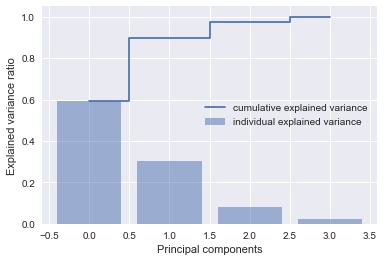

In [57]:
plt.bar(range(0, 4), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,4),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [58]:
# Transform the data into PC dimensions

car_mpg = car_mpg.reshape(len(car_mpg), 1)

eigen_space = np.array(eigvectors_sort[0:2]).transpose()

proj_data_3D = np.dot(car_attr, eigen_space)


# names = ['PC1', 'PC2' , 'PC3' , 'mpg']      Try the PCA based model with different number of PCs in the same group
names = ['PC1', 'pc2', 'mpg']

mpg_pca_array = np.concatenate((proj_data_3D, car_mpg), axis=1)

mpg_pca_df = pd.DataFrame(mpg_pca_array ,columns=names )


X = mpg_pca_array[:,0:1] # select only the PCAs
y = mpg_pca_array[:,1]   # select only the mpg column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [59]:
car_mpg.shape

(99, 1)

In [60]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
y_pred = clr.predict(X_test)

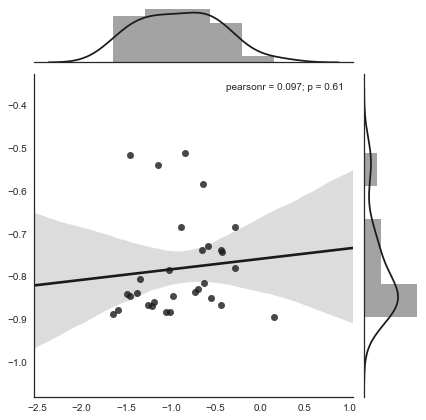

In [62]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");


# STEP 11 Feature Engineering



# Let us group by car type (large cars = 0 and others = 1)


In [63]:
# Create a separate column in the CSV file where cars with 8 and 6 cylinders are large cars (code 0) and 
# all other cars i.e. with other cylinder numbers are grouped into others (code = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E0E04B4E0>,
      dtype=object)

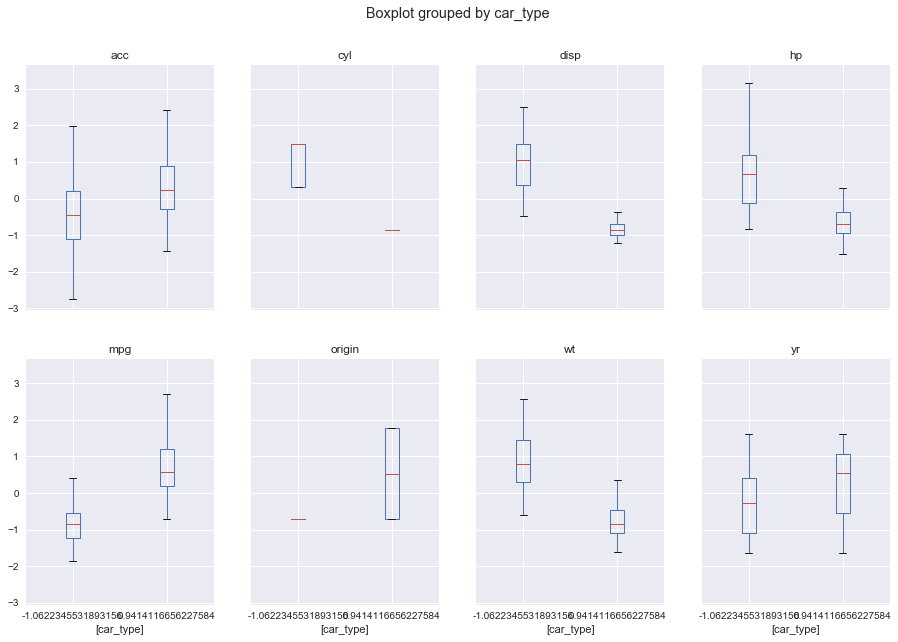

In [64]:
mpg_df_attr = mpg_df.loc[:, 'mpg':'car_type']
mpg_df_attr_z = mpg_df_attr.apply(zscore)
mpg_df_attr_z.boxplot(by = 'car_type',  layout=(2,4), figsize=(15, 10))

In [65]:
# Large cars (higher horsepower, higher displacement, higher wt) seem to have a better inverse relation with mileage than small 
# cars. Let us see if we can cluster on these dimensions

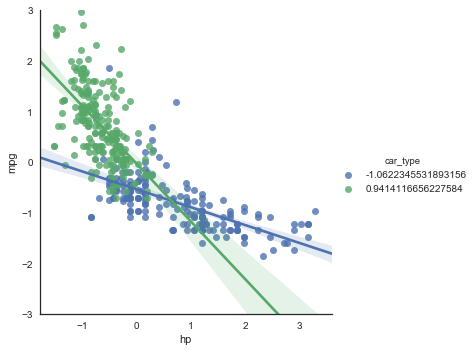

In [66]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=mpg_df_attr_z,hue='car_type')
plot.set(ylim = (-3,3))

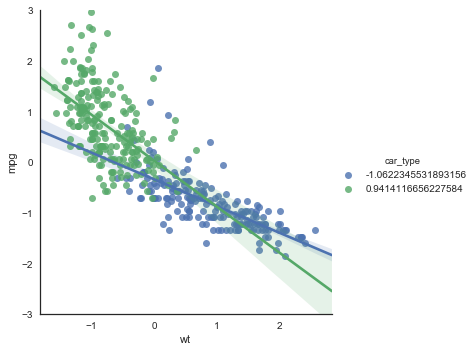

In [67]:
# mpg Vs wt

var = 'wt'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=mpg_df_attr_z,hue='car_type')
plot.set(ylim = (-3,3))

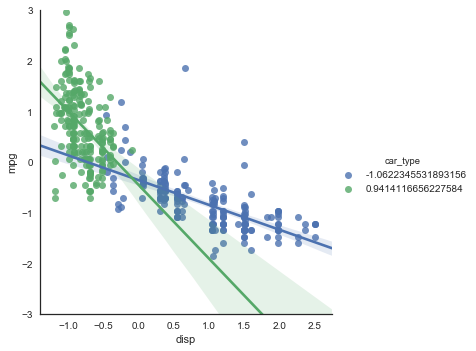

In [68]:
# mpg Vs disp

var = 'disp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=mpg_df_attr_z,hue='car_type')
plot.set(ylim = (-3,3))

In [69]:
# Let us break the data into largecar and smallcar segments

largecar = mpg_df_attr_z[mpg_df_attr_z['car_type'] < 0]   # note : largecar indicated by 0 has become negative zscore
othercar = mpg_df_attr_z[mpg_df_attr_z['car_type'] > 0]   #        othercar indicated by 1 has become positive value zscore


C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Mukesh\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


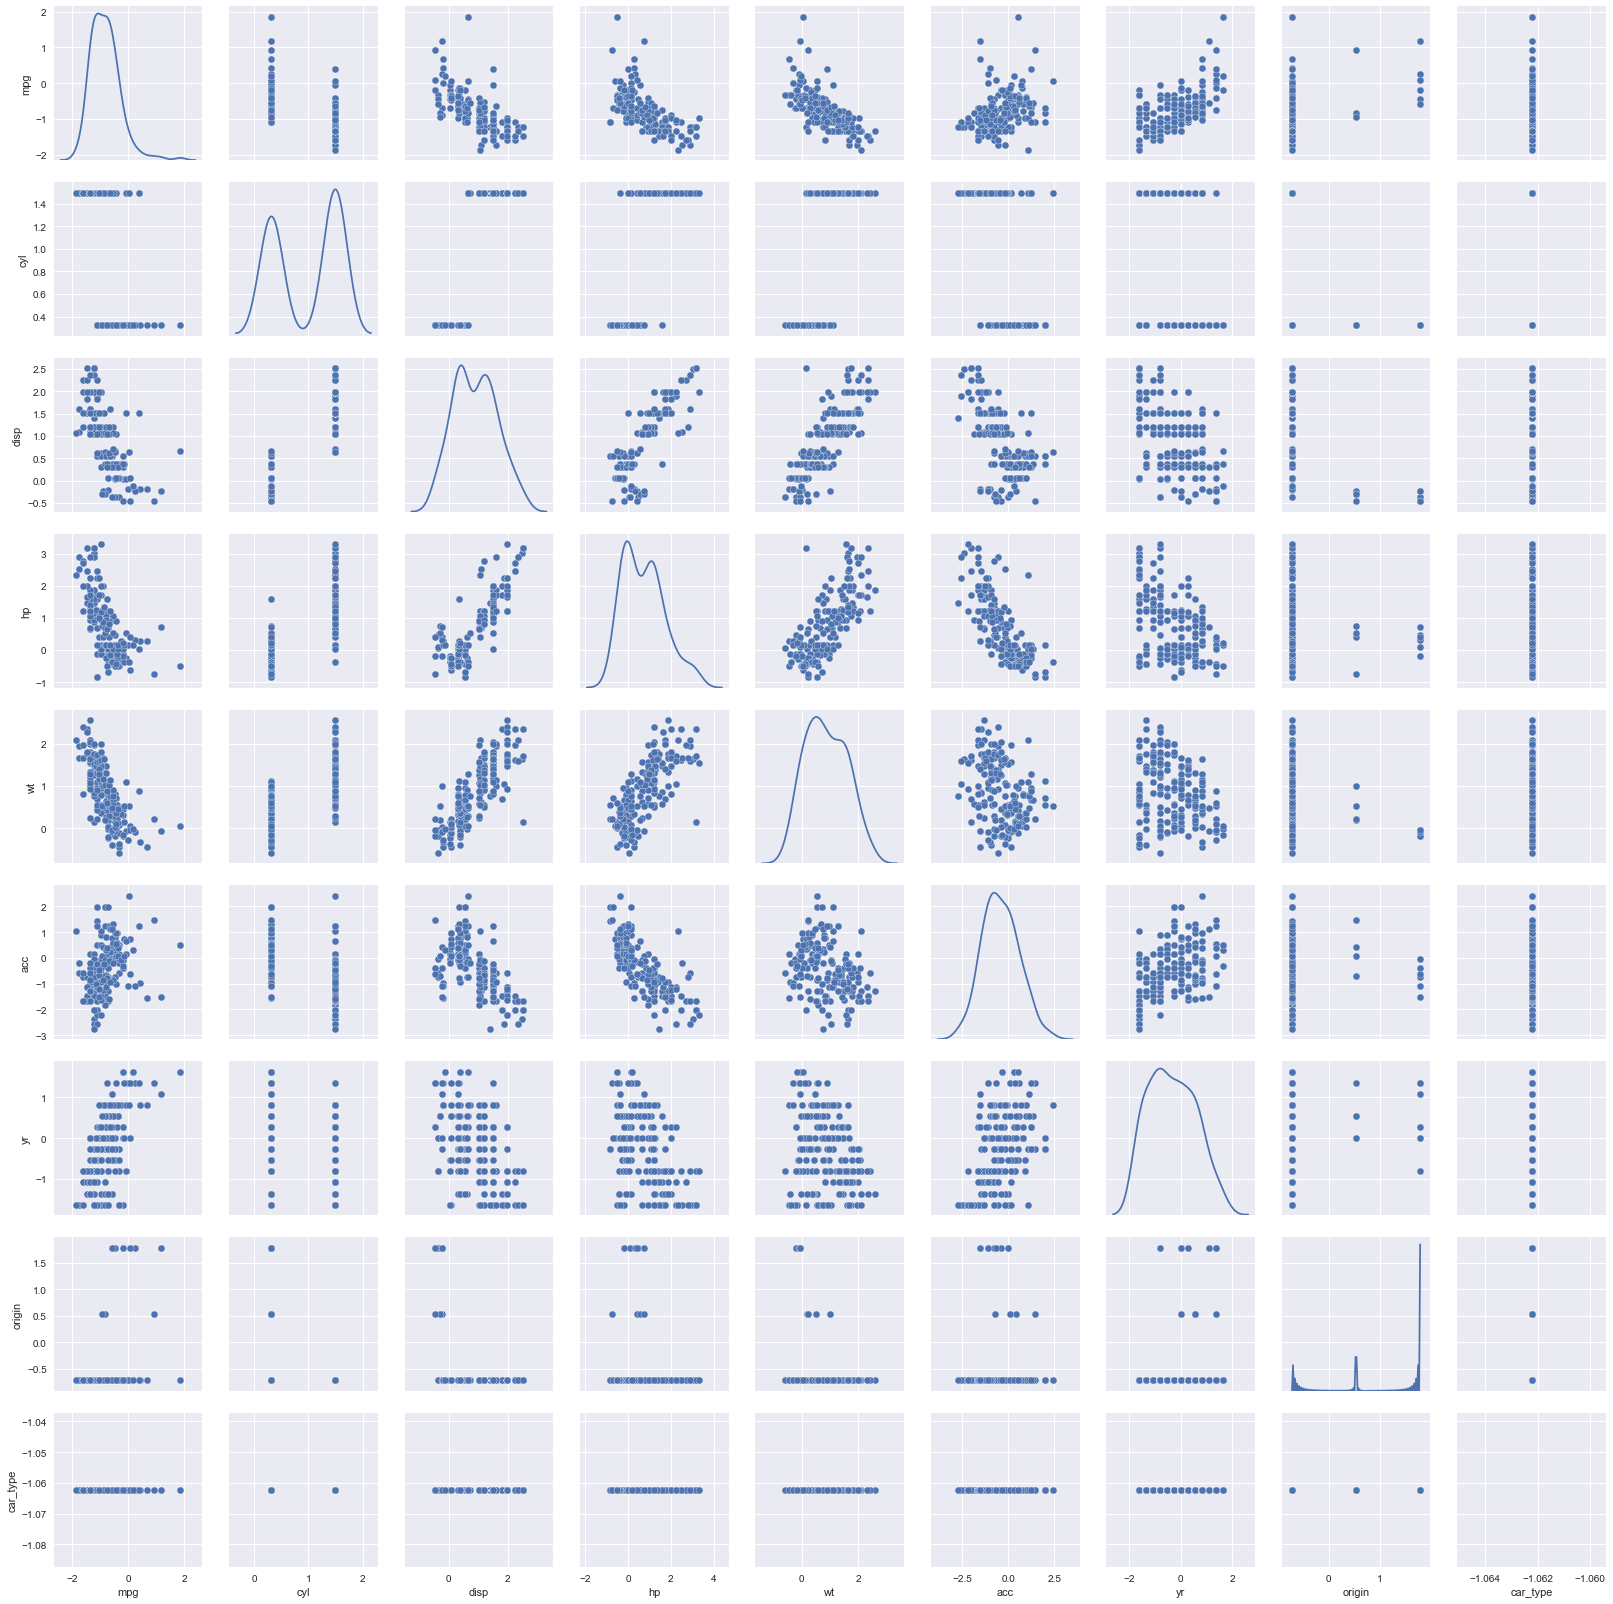

In [70]:
# Let us look at largecar pair panel

mpg_df_attr = largecar.iloc[:, 0:9]

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [72]:
array = mpg_df_attr.values
X = array[:,2:5] # select all rows and desired columns 
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [73]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
y_pred = clr.predict(X_test)

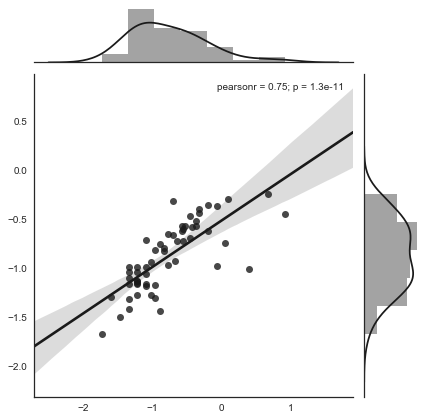

In [75]:
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [76]:
# Try PCA to improve performance

In [77]:
cols_to_drop = ["cyl", "origin", "acc" , "yr", "car_type"]

car_attr = mpg_df_attr.drop(cols_to_drop , axis = 1)

car_mpg = np.array(car_attr.pop('mpg'))


In [78]:
from sklearn.decomposition import PCA
# pca = PCA(4)
# largecar_projected = pca.fit_transform(largecar_attr)  Reason for avoiding this is the PCA will 
# automatically convert data to z scores which is already done. Hence doing the steps of PCA one by one

cov_matrix = np.cov(car_attr, rowvar=False)

np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from lowest to highest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()    # reverses the sorted pairs from increasing value of eigenvalue to lowest

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [79]:
tot = sum(eigenvalues)

var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 4 entries as there are 4 eigen vectors)

cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

cum_var_exp


array([0.86981588, 0.95877939, 1.        ])

In [80]:
# Transform the data into PC dimensions

car_mpg = car_mpg.reshape(len(car_mpg), 1)

eigen_space = np.array(eigvectors_sort[0:1]).transpose()

proj_data_3D = np.dot(car_attr, eigen_space)


#names = ['PC1', 'PC2' , 'PC3' , 'mpg']

names = ['pc1', 'mpg']

mpg_pca_array = np.concatenate((proj_data_3D, car_mpg), axis=1)

mpg_pca_df = pd.DataFrame(mpg_pca_array ,columns=names )


X = mpg_pca_array[:,0:1] # select only the PCAs
y = mpg_pca_array[:,1]   # select only the mpg column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)



In [81]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

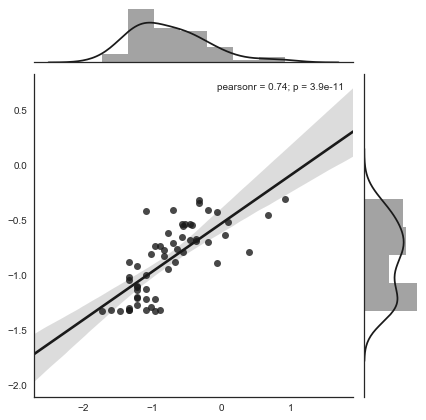

In [82]:
y_pred = clr.predict(X_test)

            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [83]:
# Observations

# 1. The mpg column for the different brand names are a suspect. Found values much larger than the factory values for those
#    cars! Definition of mpg too may have to be looked at. 

# 2. The weight of the car too is a suspect as they differed from the specifications for those models. There are different types
#    of weights. Was the data collected consistently

# 3. The HP column too had values different from the factory specifications. There are different types of HP values. Was the 
#    a standard definition followed

# Suggestions

# 1. For those instances where the declared mpg is greater than factory mpg, replace with factory mpg. Similarly for other 
#    columns. When this was doen the standard distribution for the mpg column fell by 50%